In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")

In [3]:
def shorten_number_dollar(num):
    suffixes = ['', 'K', 'M', 'B', 'T']
    order_of_magnitude = 0
    while abs(num) >= 1000 and order_of_magnitude < len(suffixes)-1:
        order_of_magnitude += 1
        num /= 1000.0
    if num == 0:
        return '$0'
    else: 
        return f'${num:.2f}{suffixes[order_of_magnitude]}'

In [4]:
print(df['Content_Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


In [5]:
df["Revenue"] = df["Installs"] * df["Price"]
revenue = df.groupby("Content_Rating")["Revenue"].sum().sort_values(ascending=False).reset_index()
revenue = revenue.set_index('Content_Rating')
revenue = revenue.reindex(index=['Unrated', 'Everyone', 'Everyone 10+', 'Teen', 'Mature 17+','Adults only 18+'])


In [7]:
df_paid_only = df[df['Type'] == 'Paid']

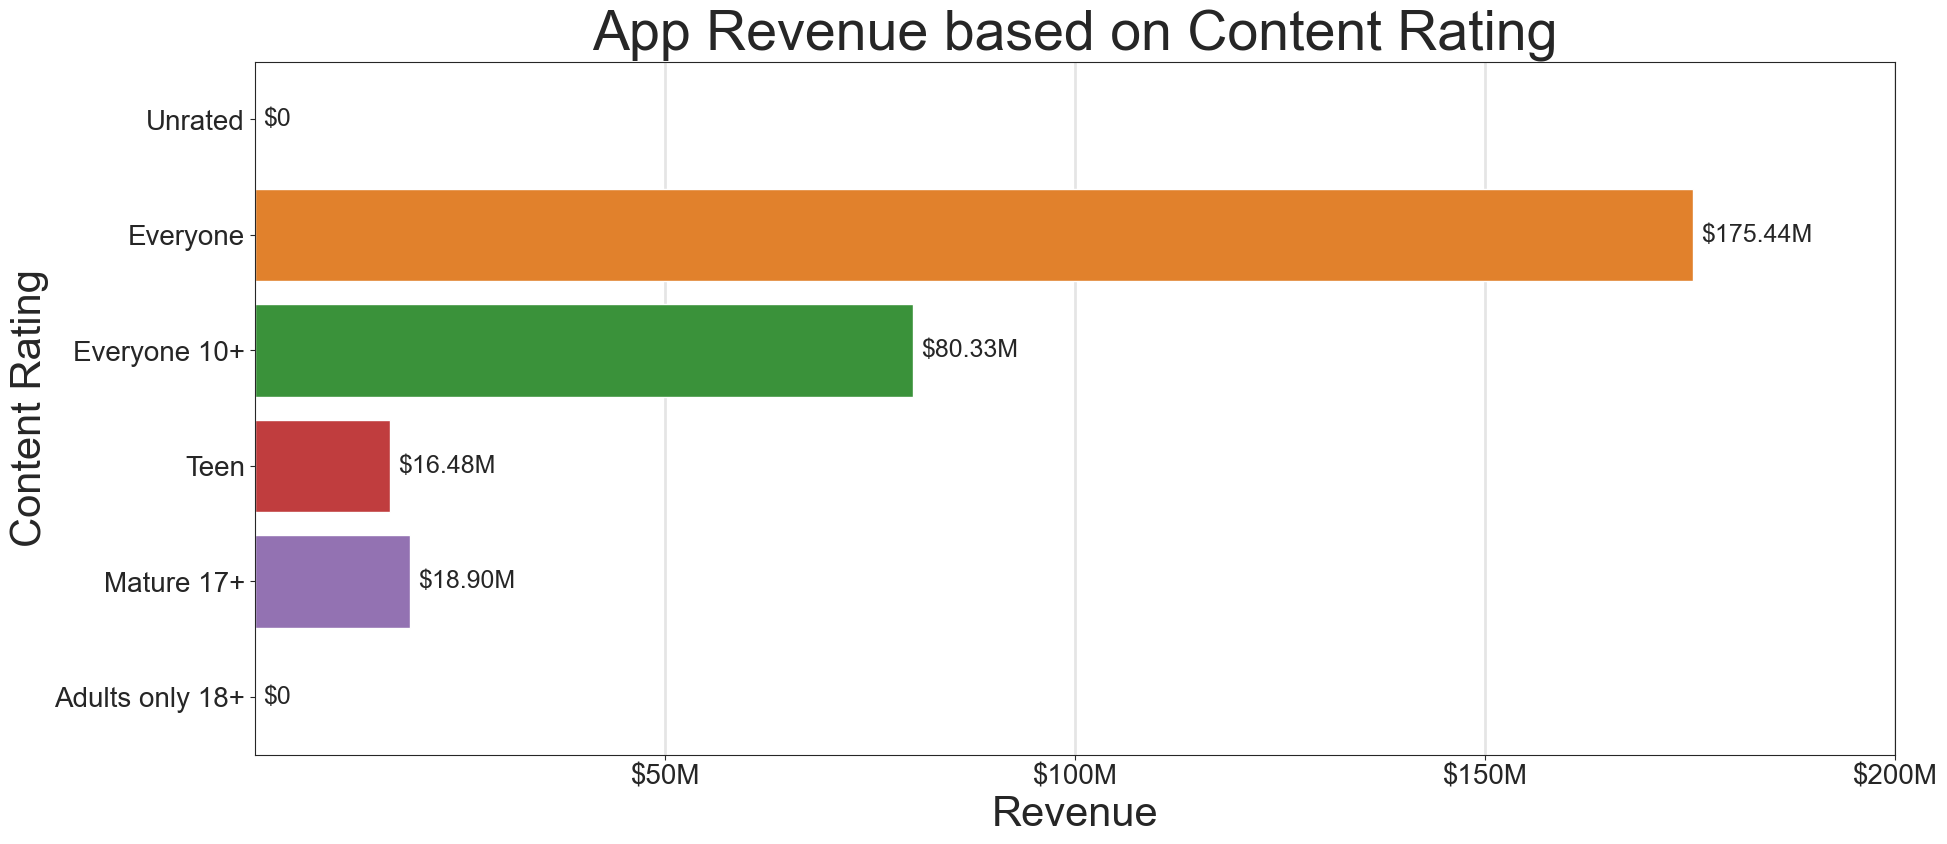

<Figure size 640x480 with 0 Axes>

In [6]:
sns.set_style("ticks")
plt.figure(figsize=(16,9))
plt.subplots_adjust(right=1.15)
sns.barplot(x="Revenue", y=revenue.index, data=revenue, orient='horizontal')
sns.set_context("talk", font_scale=1)
plt.title("App Revenue based on Content Rating", fontsize=40)
plt.ylabel("Content Rating", fontsize=30)
plt.xlabel("Revenue", fontsize=30)

xticks = [50000000, 100000000, 150000000, 200000000]
xticklabels = ['$50M','$100M','$150M','$200M']
plt.xticks(xticks, xticklabels, fontsize = 20)
plt.yticks(fontsize=20)

for i, val in enumerate(revenue["Revenue"].values):
   plt.annotate(shorten_number_dollar(val), xy=(val, i), xytext=(val+1000000, i), va='center')

plt.grid(color = 'black', alpha=0.1, linewidth = 2, axis='x')
plt.show()
plt.clf()

We can conclude that there is a big market share in the app space that has the widest age range. It's worth noting that apps rated 'Everyone' have the widest range of potential users.     

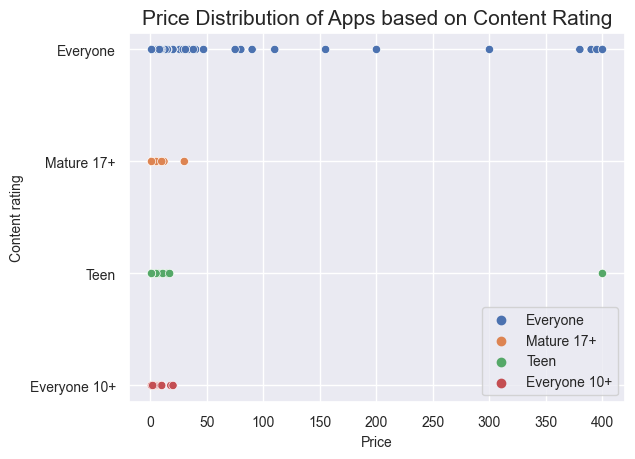

In [33]:
sns.scatterplot(data=df_paid_only, x="Price", y="Content_Rating",  hue="Content_Rating")
plt.legend(fontsize=10)
plt.title('Price Distribution of Apps based on Content Rating', fontsize = 15)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Content rating', fontsize=10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Looking at this scatter plot, we can see that the E rating has the widest range of prices (as well as the largest profit margins, looking back at the previous plot), whereas 'Everyone 10+' follows suit. It has a much narrowed range of prices, but still performs well. Judging by this, the conclusion is that prices are not in any way correlated to their category, though the biggest outreach certainly goes to the apps that everyone can use.

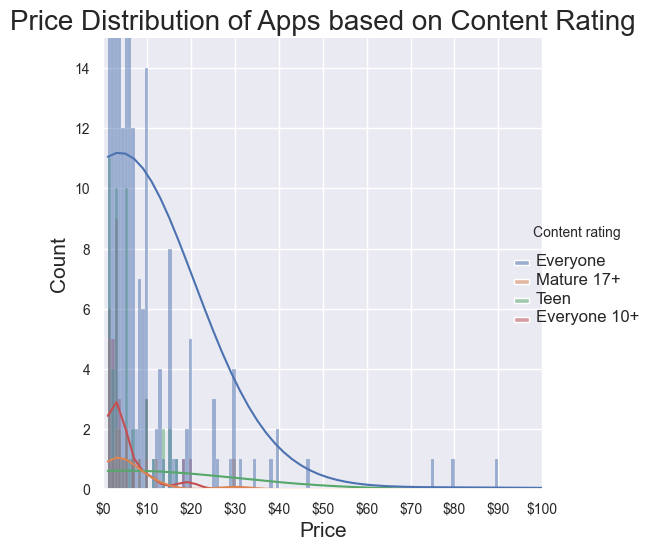

<Figure size 640x480 with 0 Axes>

In [30]:
g = sns.displot(data=df_paid_only, x="Price", hue="Content_Rating", kde=True)
g.legend.set_title("Content rating", prop={"size":10})
g.legend._legend_box.sep = 10
for t in g.legend.texts:
    t.set_fontsize(12)
plt.axis([0, 100, 0, 15])
plt.title('Price Distribution of Apps based on Content Rating', fontsize = 20)
plt.xlabel('Price')
sns.set(font_scale=0.5)
xticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
xticklabels = ['$0','$10','$20','$30','$40','$50','$60','$70','$80','$90','$100']
plt.xticks(xticks, xticklabels, fontsize=10)
plt.yticks(fontsize= 10)
plt.xlabel(xlabel = 'Price', fontsize=15)
plt.ylabel(ylabel = 'Count', fontsize=15)
plt.show()
plt.clf()

Even when we take out all free apps, the most popular price group certainly falls around that sub-$10 mark, which is to be expected, considering the low bar of entry.